# Zadanie: przestępczość

### Ładowanie bibliotek

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [5]:
df = pd.read_csv("fatal-police-shootings-data.csv")

In [6]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


## 2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [25]:
summary = (
    df.pivot_table(
        values="id", index=["race", "signs_of_mental_illness"], aggfunc="count"
    )
    .fillna(0)
    .round(2)
    .rename(columns={"id": "number_of_deaths"})
)
summary

number_of_deaths
race signs_of_mental_illness                  
A    False                                  69
     True                                   24
B    False                                1114
     True                                  184
H    False                                 745
     True                                  157
N    False                                  64
     True                                   14
O    False                                  37
     True                                   11
W    False                                1763
     True                                  713

### 3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

#### Z Map, Applymap i Appply udało mi się jedynie wyliczyć udział w całości (bez podziału na stany), próbowałem z summary.apply(lambda x: x/x.sum(), axis=0)

In [29]:
total_deaths_per_race = summary.groupby("race")["number_of_deaths"].agg("sum")
summary["percentage"] = (summary["number_of_deaths"] / total_deaths_per_race) * 100
summary

number_of_deaths  percentage
race signs_of_mental_illness                              
A    False                                  69   74.193548
     True                                   24   25.806452
B    False                                1114   85.824345
     True                                  184   14.175655
H    False                                 745   82.594235
     True                                  157   17.405765
N    False                                  64   82.051282
     True                                   14   17.948718
O    False                                  37   77.083333
     True                                   11   22.916667
W    False                                1763   71.203554
     True                                  713   28.796446

### 4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [32]:
summary = summary.reset_index()
summary_filtered = summary[summary["signs_of_mental_illness"] == True]
max_percentage_row = summary_filtered.loc[summary_filtered["percentage"].idxmax()]
print(
    f"Rasa z najwyższym procentem zgonów związanych z chorobą psychiczną to {max_percentage_row['race']}"
)

Rasa z najwyższym procentem zgonów związanych z chorobą psychiczną to W


In [34]:
df["date"] = pd.to_datetime(df["date"])
df["day_name"] = df["date"].dt.day_name()
dayname_deaths = df.groupby("day_name").size().reset_index(name="number_of_deaths")

In [36]:
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
dayname_deaths["day_name"] = pd.Categorical(
    dayname_deaths["day_name"], categories=day_order, ordered=True
)
dayname_deaths = dayname_deaths.sort_values(by="day_name").reset_index(drop=True)

In [38]:
dayname_deaths

,day_name,number_of_deaths
0,Monday,726
1,Tuesday,816
2,Wednesday,829
3,Thursday,810
4,Friday,761
5,Saturday,721
6,Sunday,753


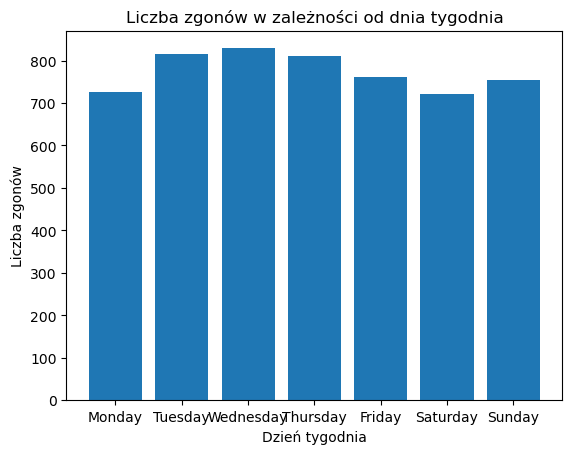

In [40]:
plt.bar(dayname_deaths["day_name"], dayname_deaths["number_of_deaths"])
plt.title("Liczba zgonów w zależności od dnia tygodnia")
plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba zgonów")
plt.show()

### 5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [43]:
states_population = pd.read_html(
    "https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population", header=0
)[0]

In [44]:
states_population = states_population[
    ["State", "Census population, April 1, 2020 [1][2]"]
].rename(
    columns={"State": "state", "Census population, April 1, 2020 [1][2]": "population"}
)

In [47]:
states_usps = pd.read_html(
    "https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations",
    header=0,
)[1]

In [48]:
states_usps = states_usps[["Name", "USPS"]].rename(
    columns={"Name": "state", "USPS": "usps"}
)

In [51]:
states_population_usps = states_population.merge(states_usps, on="state", how="inner")

In [53]:
summary_per_states = (
    df.pivot_table(values="id", index=["state"], aggfunc="count")
    .fillna(0)
    .round(2)
    .rename(columns={"id": "number_of_deaths"})
)

In [55]:
summary_per_states_with_usps = states_population_usps.merge(
    summary_per_states, left_on="usps", right_on="state", how="inner"
)
summary_per_states_final = summary_per_states_with_usps[
    ["state", "population", "number_of_deaths"]
].set_index("state")

In [57]:
summary_per_states_final["deaths_per_1000_citizens"] = (
    summary_per_states_final["number_of_deaths"]
    / (summary_per_states_final["population"] / 1000)
).round(4)

In [59]:
summary_per_states_final.sort_values("state")

,population,number_of_deaths,deaths_per_1000_citizens
state,,,
Alabama,5024279,104,0.0207
Alaska,733391,39,0.0532
Arizona,7151502,254,0.0355
Arkansas,3011524,83,0.0276
California,39538223,799,0.0202
Colorado,5773714,195,0.0338
Connecticut,3605944,21,0.0058
Delaware,989948,13,0.0131
District of Columbia,689545,13,0.0189
